Accuracy Arbre: 0.7182025894897182
Rapport Arbre:               precision    recall  f1-score   support

         0.0       0.46      0.54      0.50       342
         1.0       0.83      0.78      0.80       971

    accuracy                           0.72      1313
   macro avg       0.65      0.66      0.65      1313
weighted avg       0.73      0.72      0.72      1313

Accuracy k_proch scaled: 0.7631378522467631
Rapport k_proch:               precision    recall  f1-score   support

         0.0       0.55      0.47      0.51       342
         1.0       0.82      0.87      0.84       971

    accuracy                           0.76      1313
   macro avg       0.69      0.67      0.68      1313
weighted avg       0.75      0.76      0.76      1313



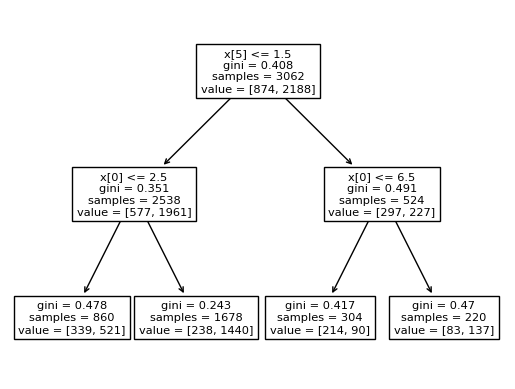

In [19]:
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
df = pd.read_csv('credit_scoring.csv', delimiter=';')
nup_arr = np.array(df)
# print(nup_arr)
# print(df)
caracters = nup_arr[:, :-1]
statut = nup_arr[:, -1]

# aroundir les chiffre en deux chiffres après le virgule 
def round_two(arr):
    new_arr = []
    for i in range(len(arr)):
        old_arr = []
        for j in range(len(arr[i])):
            old_arr.append(round(arr[i][j], 2))
        new_arr.append(old_arr)
    return new_arr
caract = round_two(caracters)

# total N° Negatives
n_pos = df[df['Status'] == 1].shape[0]
# total N° Positives
n_neg = df[df['Status'] == 0].shape[0]
# mettre en array N° positives
arr_pos = [1 for x in range(n_pos)]
# mettre en array N° negatives
arr_neg = [0 for x in range(n_neg)]

# plt.hist([df['Seniority'], arr_neg])
# print("Taille de l'ensemble d'apprentissage (X_train) :", X_train.shape[0])
# print("Taille de l'ensemble de test (X_test) :", X_test.shape[0])
X_train,X_test,y_train,y_test = train_test_split(caract,statut,test_size=0.3)

# plt.plot(X_train)
# plt.plot(X_test)
# plt.plot(y_train)
# plt.plot(y_test)
# plt.legend(['X_train','X_test', 'y_train', 'y_test'])
# plt.show()
# plt.close()
def trente(start, end, arr):
    new_arr = []
    for i in range(start, end):
        new_arr.append(int(arr[i]))
    return new_arr

statut_trente = trente(y_train.shape[0], y_train.shape[0] + y_test.shape[0], statut)
# print("Statut 30%", len(statut_trente))
# print("Statut test 30%", len(y_test))

# print(statut_trente)
# print(y_test)
# print( statut_trente == y_test)

tp = statut_trente.count(1)
tn = statut_trente.count(0)
fp = np.count_nonzero(y_test == 1)
fn = np.count_nonzero(y_test == 0)

# xx = df['Age']
# yy = df['Seniority']
# plt.plot(xx, yy, '.')
# plt.show()
# plt.close()
accuracy = (tp + tn) / (tp + tn + fp + fn)

# print(accuracy)
# print('Statut 0 =' , tn , ', Statut 1 = ' , tp, tn + tp)
# print('Prediction 0 =' , fn , ', Prediction 1 = ' , fp, fp + fn)
# Création d'un modèle d'arbre CART
tree_carte = DecisionTreeClassifier(max_depth = 2)
# Entraînage du modèle sur l'ensemble d'apprentissage
tree_carte.fit(X_train, y_train)
# premier appearance
tree.plot_tree(tree_carte)
# prédictions sur l'ensemble de test
predic_arbre = tree_carte.predict(X_test)
# on évalue la performance du modèle
accur = accuracy_score(y_test, predic_arbre)
report = classification_report(y_test, predic_arbre)
# print("Accuracy :", accur)
# print("Rapport:", raport)
# Création du modèle k-plus-proches-voisins avec k=5
k_proch = KNeighborsClassifier(n_neighbors=5)
# on entrain le modèle sur l'ensemble d'apprentissage à l'aide de fn fit
k_proch.fit(X_train, y_train)
# prédictions sur l'ensemble de test à l'aide de fn predict
predictions_k_proch = k_proch.predict(X_test)
# Évaluation de la performance du modèle à l'aide de fn accuracy_score
accuracy_kp = accuracy_score(y_test, predictions_k_proch)
report_kp = classification_report(y_test, predictions_k_proch)
# print("Accuracy :", accuracy_kp)
# print("Rapport :", accuracy_kp)

# Création des pipelines pour chaque modèle avec la normalisation
pipeline_arbre = Pipeline([
    # pour tester on peut simplement remplacer MinMaxScaler() à la place de StandardScaler()
    ('scaler', StandardScaler()),  # Normalisation 
    ('arbre', DecisionTreeClassifier(random_state=42))  # Modèle d'arbre CART
])

pipeline_kp = Pipeline([
    # pour tester on peut simplement remplacer MinMaxScaler() à la place de StandardScaler()
    ('scaler', StandardScaler()),  # Normalisation
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Modèle k-proch avec k=5
])

# Entraînage
pipeline_arbre.fit(X_train, y_train)
pipeline_kp.fit(X_train, y_train)
# prédictions d'arbre et k_proch
predic_arbre_scaled = pipeline_arbre.predict(X_test)
predic_kp_scaled = pipeline_kp.predict(X_test)

# on évalue la performance des modèles normalisés
accuracy_arbre_scaled = accuracy_score(y_test, predic_arbre_scaled)
accuracy_kp_scaled = accuracy_score(y_test, predic_kp_scaled)
# le raport de ce qu'on a évaluer sur arbre et k_proch
report_arbre_scaled = classification_report(y_test, predic_arbre_scaled)
report_kp_scaled = classification_report(y_test, predic_kp_scaled)

# print("Accuracy Arbre:", accuracy_arbre_scaled)
# print("Rapport Arbre:", report_arbre_scaled)

# print("Accuracy k_proch scaled:", accuracy_kp_scaled)
# print("Rapport k_proch:", report_kp_scaled)
